# Homework 2

**Due: 02/13/2020**


## References

+ Lectures 7-10 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.


**Note**: Please match all the pages corresponding to each of the questions when you submit on gradescope. 

## Student details

+ **First Name:**
+ **Last Name:**
+ **Email:**

In [1]:
# Here are some modules that you may need - please run this block of code:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
import numpy as np
import scipy
import scipy.stats as st

## Problem 1
### Part A
Let $X$ be a continuous random variable with CDF:
$$
F(x) = p(X \le x).
$$
Show that the random variable
$$
Z = F(X)
$$
    is distributed uniformly in $[0,1]$.
    Hint: Show that:
$$
    F_Z(z) := p(Z \le z) = z.
$$
**Proof:**

*Type your proof here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

### Part B

The theorem you have just proved is very useful when you want to test if a set of observations $x_1,x_2,\dots,x_N$ has been indeed independent realizations of a random variable $X$ with CDF $F(x)$.
Part A proves that, if this hypothesis is valid, then the transformed dataset $z_1,z_2,\dots,z_N$, where
$$
z_i = F(x_i),
$$
should be distributed uniformely in $[0,1]$.
In other words, the empirical histrogram of $z_1,z_2,\dots,z_N$ should be a flat line.
Use this observation to find the distribution from which this dataset was sampled:

Text(0.5, 1.0, 'Histogram of data')

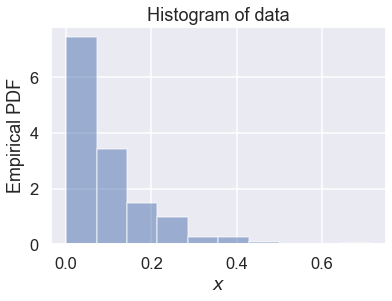

In [2]:
data = np.loadtxt('hw2_p1b_data.txt')
fig, ax = plt.subplots()
ax.hist(data, density=True, alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('Empirical PDF')
ax.set_title('Histogram of data')

The correct distribution is one of the following:

1. Standard normal, $\mathcal{N}(0,1)$;

2. Normal with mean 2 and variance 2, $\mathcal{N}(2,2); or

3. Exponential with rate parameter $1$, $\mathcal{E}(1)$; or

4. Exponential with rate parameter $2$, $\mathcal{E}(2)$; or

5. Exponential with rate parameter $10$, $\mathcal{E}(10)$; or

6. Gamma distribution with parameters $\alpha=2.$ and $\beta=3.$.

Systematically go over these distributions and try to determine which one generated the data.
All the required CDF's and inverse CDF's are implemented in [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).
Check also [scipy.stats.rv_continuous](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous).)
Please pay special attention to the defintiion of the probability distributions of the various random variables and how you can control their parameters.
As a hint, here is how you can test for $\mathcal{N}(0,1)$:

In [ ]:
# Testing for N(0,1):
transformed_data = st.norm(loc=0, scale=1).cdf(data) # cdf() gives the CDF of a random variable
# If the data came from N(0,1), the histogram of the transformed_data should match that of a uniform:
fig, ax = plt.subplots()
ax.hist(transformed_data, density=True, alpha=0.5)
ax.plot(np.linspace(0, 1,50), np.ones(50), lw=2, color='r') # This is the line that you should try to much.
ax.set_xlabel('$z = F(x)$')
ax.set_ylabel('Empirical PDF')
ax.set_title('Testing the $\mathcal{N}(0,1)$');

## Problem 2

### Part A
Let $U\sim U(0,1)$ and let $F(x)$ be a function with the following properties:
+ $F(-\infty) = 0$,
+ $F(\infty)=1$, 
+ and $x_1 \le x_2\Rightarrow F(x_1)\le F(x_2)$.

Consider the random variable:
$$
X = F^{-1}(U),
$$
where $F^{-1}$ is the inverse of $F$.
Show that the CDF of $X$ is $F(x)$, i.e.,
$$
F(x) = P(X \le x).
$$
This is essentially the proof that *inverse transform sampling* works.
In a while, you will use it to learn how to sample from a continuous univariate random variable when all you have is samples from it.

**Proof:**

*Type your proof here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

### Part B

Consider the following data set $x_1,\dots,x_N$:

In [ ]:
data = np.loadtxt('hw2_p2_data.txt')
data = np.array(data)
fig, ax = plt.subplots()
ax.hist(data, alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('Empirical PDF')

Your goal is to generate a procedure that samples from the same distribution as the observed data. 
This is a variation of the standard *density estimation* problem.
In general, this is a very difficult problem and we will see various ways to solve it later on.
In this problem, you will develop a simple method that relies on the empirical CDF of the observed data.
Needless to say, this method works only for one dimensional cases in which you have a lot of observations.

The [empirical CDF](https://en.wikipedia.org/wiki/Empirical_distribution_function) of our data set, $x_1,\dots,x_N$ is defined to be:
$$
\hat{F}_N(x) = \frac{\text{Number of observations}\;\le x}{N} = \frac{1}{N}\sum_{i=1}^N 1_{[x_i,+\infty]}(x),
$$
where $1_A(x)$ is the [indicator function](https://en.wikipedia.org/wiki/Indicator_function) of the set $A$.
Using the, so called, [strong law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers#Strong_law), we can show that $\hat{F}_N(x)$ converges to the true CDF of the data as $N\rightarrow+\infty$.

Complete the code that calculates the empirical CDF:

In [ ]:
def myECDF_base(x):
    """
    Make this code work if ``x`` is a simple scalar.
    
    :param x:    The point at which you want to observe the PDF.
    :param data: All the data you have observed (1D numpy array).
    :returns:    The value of the empirical CDF at ``x``.
    """
    N = data.shape[0]
    # Write your code here (delete the next line and return the right value)
    raise NotImplementedError('Implement me!')

# Vectorize your function (i.e., make it work with 1D numpy arrays).
# See this: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vectorize.html
myECDF = np.vectorize(myECDF_base)

In [ ]:
# You can test your results by comparing the empirical CDF you can get with of scipy.stats
# The two should match almost exactly
hist_rv = st.rv_histogram(np.histogram(data, bins=1000))
fig, ax = plt.subplots()
# The range in which the x's takes values:
x_min = data.min()
x_max = data.max()
xx = np.linspace(x_min, x_max, 100)
ax.plot(xx, myECDF(xx), label='My empirical CDF')
ax.plot(xx, hist_rv.cdf(xx), '--', label='Empirical CDF from scipy.stats')
ax.set_xlabel('$x$')
ax.set_ylabel('Empirical CDF')
plt.legend(loc='best')

Now complete the code that computes the inverse of the empirical CDF $\hat{F}^{-1}$.
There are may ways of doing this.
Let's do it in a way that will teach us something about the root finding toolbox of numpy (see [this]()).
Mathematically, we wish to find a function $F^{-1}$ such that
$$
F(F^{-1}(u))) = u,
$$
for any $u\in[0,1]$ (the domain in which $F(x)$ takes values).
It is obvious that $F^{-1}(u)$ is the solution to the *root finding* problem:
$$
F(x^*) = u.
$$
Since we know that $F$ is increasing, this problem must have a unique solution for any $u\in[0,1]$.
To find this solution, we can use [Brent's method](https://en.wikipedia.org/wiki/Brent%27s_method).
Please note, that the problem that this code solves is of the form:
$$
g(x^*) = 0.
$$
So, you will have to reformulate the original problem as:
$$
F(x^*) - u = 0.
$$
Study the [numpy implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html#scipy.optimize.brentq) of Brent's method and complete the following code:

In [ ]:
from scipy import optimize    # Gives you access to optimize.brentq

def myiECDF_base(u):
    """
    Evaluates the inverse of the empirical CDF.
    
    :param u:   A scalar at which to evaluate the function.
    :param data: All the data you have observed (1D numpy array).
    :returns:    The value of the inverse of the empirical CDF at ``u``.
    """
    # Write your code here
    # You will have to define a functioin to pass to optimize.brentq
    # You can define this function in here
    # (delete the next line and return the right value)
    raise NotImplementedError('Implement me!')

# Vectorize your function (i.e., make it work with 1D numpy arrays).
# See this: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vectorize.html
myiECDF = np.vectorize(myiECDF_base)

In [ ]:
# You can test your results by comparing the inverse of the empirical CDF you can get with scipy.stats
# The two should match almost exactly
hist_rv = st.rv_histogram(np.histogram(data, bins=1000))
fig, ax = plt.subplots()
uu = np.linspace(1e-3, 1, 100)    # For convergence issues we cannot start at 0
ax.plot(uu, myiECDF(uu), label='Inverse of my empirical CDF')
ax.plot(uu, hist_rv.ppf(uu), '--', label='Inverse of empirical CDF from scipy.stats')
ax.set_xlabel('$x$')
ax.set_ylabel('Inverse of empirical CDF')
plt.legend(loc='best')

### Part C

Now use the *inverse transform sampling* method to generate samples from same distribution as the original data.
That is, you can now generate uniform samples:
$$
u_i \sim U([0,1]),
$$
and transform them as:
$$
\hat{x}_i = {\hat{F}}^{-1}(u_i).
$$
The $\hat{x}_i$'s generated in this way should have the same distribution of the data you started with.
Verify this by comparing the histrogram of $1,000$ $\hat{x}_i$ samples with the original data of this problem.

In [ ]:
# Write your code here.
# Feel free to copy paste code from above.

## Problem 4

This is a classic uncertainty propagation problem that you will have to solve using Monte Carlo sampling.
Consider the following stochastic harmonic oscillator:
$$
\begin{array}{ccc}
\ddot{y} + 2 \zeta \omega(X) \dot{y} + \omega^2(X)y &=& 0,\\
y(0) &=& y_0(X),\\
\dot{y}(0) &=& v_0(X),
\end{array}
$$
where:
+ $X = (X_1, X_2, X_3)$,
+ $X_i \sim N(0, 1)$,
+ $\omega(X) = 2\pi + X_1$, 
+ $\zeta = 0.01$,
+ $y_0(X) = 1+ 0.1 X_2$, and
+ $v_0 = 0.1 X_3$.

In words, this stochastic harmonic oscillator has an uncertain natural frequency and uncertain initial conditions.

Our goal is to propagate uncertainty through this dynamical system, i.e., estimate the mean and variance of its solution.
A solver for this dynamical system is given below:

In [ ]:
class Solver(object):
    def __init__(self, nt=100, T=5):
        """
        This is the initializer of the class.
        
        Arguments:
            nt - The number of timesteps.
            T  - The final time.
        """
        self.nt = nt
        self.T = T
        self.t = np.linspace(0, T, nt) # The timesteps on which we will get the solution
        # The following are not essential, but they are convenient
        self.num_input = 3             # The number of inputs the class accepts
        self.num_output = nt           # The number of outputs the class returns
        
    def __call__(self, x):
        """
        This special class method emulates a function call.
        
        Arguments:
            x - A 1D numpy array with 3 elements. This represents the stochastic input x = (x1, x2, x3).
        """
        ##uncertain quantities 
        x1 = x[0]
        x2 = x[1]
        x3 = x[2]
        
        #ODE parameters 
        omega = 2*np.pi + x1 
        y10 = 1 + 0.1*x2
        y20 = 0.1*x3
        y0 = np.array([y10, y20])   #initial conditions 
        
        #coefficient matrix 
        zeta = 0.01
        k = omega**2    ##spring constant
        c = 2*zeta*omega   ##damping coeff. 
        C = np.array([[0, 1],[-k, -c]])
        
        #RHS of the ODE system
        def rhs(y, t):
            return np.dot(C, y)
        
        y = scipy.integrate.odeint(rhs, y0, self.t)
        
        return y

Let's plot a few samples of the forward model to demonstrate how the solver works.

In [ ]:
# 1. Create the solver object
solver = Solver()
fig1, ax1 = plt.subplots()
ax1.set_xlabel('$t$ (Time)')
ax1.set_ylabel('$y(t)$ (Position)')
fig2, ax2 = plt.subplots()
ax2.set_xlabel('$t$ (Time)')
ax2.set_ylabel('$\dot{y}(t)$ (Velocity)')
for i in range(2):
    # Sample the random inputs (they are just standard normal)
    x = np.random.randn(solver.num_input) # solver.num_input is just 3
    # Evaluate the solver response
    y = solver(x) # This returns an (num timesteps) x (num states) array (100 x 2 here)
    # Plot the sample
    ax1.plot(solver.t, y[:, 0])
    ax2.plot(solver.t, y[:, 1], label='Sample {0:d}'.format(i+1))
plt.legend(loc=True)

For your convenience, here is code that takes many samples of the solver at once:

In [ ]:
def take_samples_from_solver(num_samples):
    """
    Takes ``num_samples`` from the ODE solver.
    
    Returns them in an array of the form: ``num_samples x 100 x 2`` (100 timesteps, 2 states (position, velocity))
    """
    samples = np.ndarray((num_samples, 100, 2))
    for i in range(num_samples):
        samples[i, :, :] = solver(np.random.randn(solver.num_input))
    return samples

It works like this:

In [ ]:
samples = take_samples_from_solver(50)
print(samples.shape)
print(samples)

### Part A
Take 100 samples of the solver output and plot the estimated mean position and velocity as a function of time along with a 95\% epistemic uncertainty interval around it. 
This interval captures how sure you are about the mean response when using only 100 Monte Carlo samples.
You need to use the central limit theorem to find it (see the lecture notes).

In [ ]:
samples = take_samples_from_solver(100)
# Sampled positions are: samples[:, :, 0]
# Sampled velocities are: samples[:, :, 1]
# Sampled position at the 10th timestep is: samples[:, 9, 0]
# etc.

# Your code here

### Part B
Investigate how many samples you need so that there is negligible epistemic uncertainty about the mean response.

In [ ]:
# Your code here

### Part C
Repeat part A and B for the squared response.
That is, do exactly the same thing as above, but consider $y^2(t)$ and $\dot{y}^2(t)$ instead of $y(t)$ and $\dot{y}(t)$.
How many samples do you need to estimate the mean squared response with negligible epistemic uncertainty?

In [ ]:
# Your code here

### Part D

Now that you know how many samples you need to estimate the mean of the response and the square response, use the formula:
$$
\mathbb{V}[y(t)] = \mathbb{E}[y^2(t)] - \left(\mathbb{E}[y^2(t)]\right),
$$
and similarly for $\dot{y}(t)$, to estimate the variance of the position and the velocity with negligible epistemic uncertainty.
Plot both quantities as a function of time.

In [ ]:
# Your code here

### Part E

Put together the estimated mean and variance to plot a 95\% predictive interval for the position and the velocity as functions of time.

In [ ]:
# Your code here

-End-